## Final Project Submission - Jupyter Notebook _1

Please fill out:
* Student name: **Dennis Trimarchi**
* Student pace: **full time**
* Scheduled project review date/time: **Not yet scheduled**
* Instructor name: **Rafael Cassaro**
* Blog post URL: **Not yet created**


## Data Cleaning & EDA, Formulating Questions

This notebook contains all of my initial data cleaning as well as Exploratory Data Analysis

### Step 1 - Import a bunch of libraries

There are a bunch of libraries that are used in this project. They are imported and aliased below.

In [28]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('paper')


#STATSMODELS

#statistical analysis & regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#SCIKIT LEARN

#metrics
#from sklearn.metrics import mean_squared_error

#linear regression
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#label encoding
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()

#create dummy variables
#from sklearn.preprocessing import LabelBinarizer
#lb_bin = LabelBinarizer()

#recursive feature elimination
#from sklearn.feature_selection import RFE

#train test split
#from sklearn.model_selection import train_test_split

#k-fold cross validation
#from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
#import pickle

### Step 2 - Basic Inspection of Data

Read in the dataset from file and start to investigate basic things

In [29]:
#Read in the csv file and inspect the first few rows of data
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [30]:
#Show the datatypes and row counts for each field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [31]:
#Quickly view some basic statistical information for each feature and the target
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Initial Data Analysis / Thoughts**
- **id**: unique identifier for a home. Can use as index or drop and use index already in the dataframe. DROP
- **date**: convert to datetime and see if possible correlation with home price - summer vs winter maybe.
- **price**: THIS IS THE TARGET FEATURE
- **bedrooms**: likely correlation with price. Also likely to be collinear with some of the other features.
- **bathrooms**: same as above
- **sqft_living**: same as above
- **sqft_lot**: Possible correlation with price I think. Unless there are really expensive condos in the city.
- **floors**: possible correlation with price. My guess would be weak correlation.
- **waterfront**: A view to waterfront is probably correlated with price. Assumption that 0=no waterfront, 1=waterfront
- **view**: Not exactly sure what this means. Appears to be numbered from 1 to 4. Only a small portion of the records are non-zero. 
- **condition**: overall condition probably impacts price. Looks like a number from 1 to 5.
- **grade**: Can't find information online regarding the basis of the king county grading system. Will inspect data.
- **sqft_above**: likely correlation with price.
- **sqft_basement**: Not sure if having a basement at all would impact price. Depends on the real estate market in Seattle I guess.
- **yr_built**: Might have an impact on price. Median is 1975.
- **yr_renovated**: 75th percentile is zero! Seems like a lot of the homes have not been renovated, or that the data is missing.
- **zipcode**: I suspect that certain zipcodes are correlated with price. I do not know which zip codes these are. This is a categorical feature and should not be treated as continuous. Maybe the zip code prefix has a correlation with price.
- **lat**: Maybe there will be a correlation? Possibly use with longtitude to get a distance from some place.
- **long**: Maybe there will be a correlation? Possibly use with latitude to get a distance from some place. With all of the natural features in the Seattle area, this might be a waste of time.
- **sqft_living15**: probably correlated the same as sqft_living. Similar 25, 50, 75 percentiles.
- **sqft_lot15**: I don't suspect this will impact price. Similar to sqft_lot.

### QUESTIONS:

1. Are waterfront properties significantly more expensive?
2. Are newer homes more expensive?
3. What impacts price more, square footage of living space or number of bedrooms?

### Step 3: Clean up some features

- Drop ID column
- Date should be converted to datetime (decided to drop in the end because only 1 yr of data)
- Sqft Basement should be converted to a number - it is currently an object in the dataset
- Zipcode should be categorical

In [32]:
#Drop ID column as it is fine to use the default index in the dataset. I verified no duplicates.
data.drop(['id'], axis=1, inplace=True)

In [33]:
#Convert date to datetime type
data['date'] = pd.to_datetime(data['date'])

In [34]:
data['date'].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

Since the date is only one year of data, I am going to drop the feature.

In [35]:
#Drop date column
data.drop(['date'], axis=1, inplace=True)

Sqft Basement needs to be converted into a number. Upon initial attempt to convert, received an error because some of the rows contain "?" as a value. Will replace the ?'s with NAN and then convert the feature to a number field. 

Note: Decided later to use zero instead of NAN... making the assumption that ? meant no basement or no evidence of basement. Plus, the median value is zero.

In [36]:
#Replace ?'s with NAN or zero - I decided to assume that ?s meant no basement. I will make it zero.
data['sqft_basement'] = data['sqft_basement'].map(lambda x: 0 if x=='?' else x)

#Convert sqft_basement to a number
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [37]:
data['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Let's take a look at **zip code:**

There are 70 unique zip codes which I do not want to use as categories. Way too many.

There are 2 unique zip code prefixes:
- 980	WA	Seattle	Bellevue, Auburn, areas around Seattle
- 981	WA	Seattle	SEATTLE

Below, I create a categorical variable: zip_981 that represents 981 Seattle City zip codes.

In [38]:
#See number of unique zip codes
print("Unique zip codes: {}".format(data['zipcode'].nunique()))

#See number of unique zip prefixes
print("Zip code prefixes and value counts")
zip_prefix = data['zipcode']//100
print(zip_prefix.value_counts())

#Create new feature zip_981 based on zipcode prefix
data['zip_981'] = data['zipcode'].apply(lambda x: 1 if x//100 == 981 else 0)

Unique zip codes: 70
Zip code prefixes and value counts
980    12624
981     8973
Name: zipcode, dtype: int64


**Below is a map of the area with price represented by color.**

Lat and Long are used as our axis variables.

Text(0.5, 1.0, 'Price by Geographical Area')

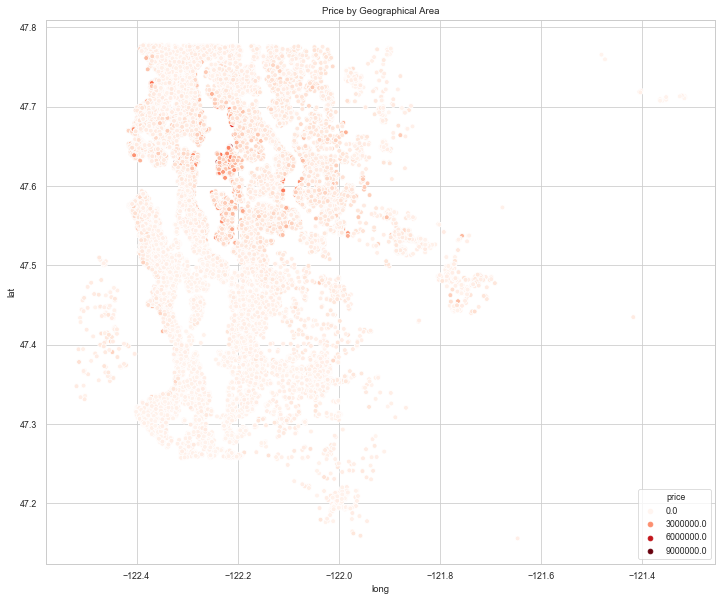

In [39]:
plt.figure(figsize=(12,10))
sns.scatterplot(data['long'], data['lat'], hue=data['price'], palette='Reds')
plt.legend(loc='lower right')
plt.title("Price by Geographical Area")

This figure is cool. The darker areas represent higher prices. It looks as though areas around and east of Lake Washington are darker. In particular, Bellvue, WA is dark in this figure. The southern part of the county appears to have lower prices in general.

### Step 4: Inspect the data for outliers, NaN and remove / replace as needed

Slice and dice the data

Ok... now that all of the features are the proper data types. Let's look at the features histograms and their scatter against the price (target). This will help to identify outliers.

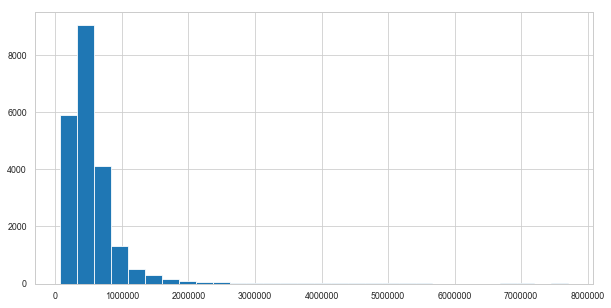

In [40]:
#Check histogram of prices to see if normally distributed
data['price'].hist(figsize=(10,5),bins=30)

The price is skewed with a tail on the high end. Recall that max is 7.7M but 75%ile is 645k. 
**Decision:** Remove prices above 2.0Mil.

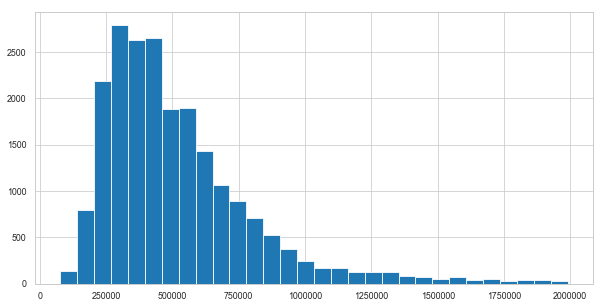

In [41]:
data = data.loc[data['price']<2000000]
data['price'].hist(figsize=(10,5),bins=30)

Looks much better. It is still skewed but more balanced than before. The mean is closer to the median than it was.

#### Revisit Geography plot

Text(0.5, 1.0, 'Price by Geographical Area')

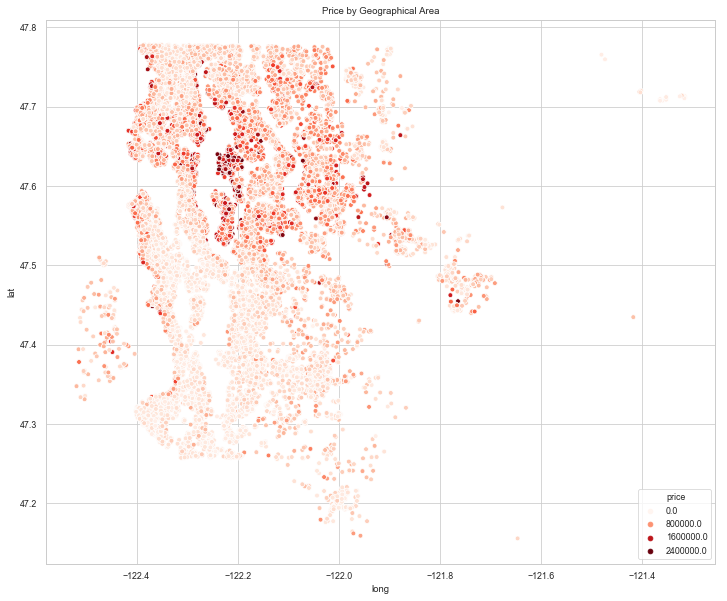

In [42]:
plt.figure(figsize=(12,10))
sns.scatterplot(data['long'], data['lat'], hue=data['price'], palette='Reds')
plt.legend(loc='lower right')
plt.title("Price by Geographical Area")

Even cooler than before. The dark areas are more pronounced. It looks like areas directly east of Seattle are more expensive.

#### Scatter and histogram of each feature

Start with a correlation check to see which features to inspect first. Will go down the list. 

Unfortunately the time spent making zip_981 was no good. I will drop it along with zipcode. I will drop them along with features with **correlation < 0.1.**

Note: Will plan to keep **long** variable even though correlation is low in case it can be used to define a new feature based on geolocation.

In [43]:
#Quick correlation check with price to see if there are any features that are interesting.
correlations = data.corr()
correlations['price'].sort_values(ascending=False)

price            1.000000
grade            0.680880
sqft_living      0.679490
sqft_living15    0.601513
sqft_above       0.584374
bathrooms        0.508470
lat              0.363536
view             0.343392
bedrooms         0.316763
sqft_basement    0.282901
floors           0.278638
waterfront       0.149315
yr_renovated     0.120569
sqft_lot         0.098013
sqft_lot15       0.088028
yr_built         0.063376
long             0.041237
condition        0.037310
zip_981         -0.005915
zipcode         -0.046909
Name: price, dtype: float64

In [44]:
#define a function that will provide a couple plots for a feature - histogram and scatter
def feature_plots(feature,target,df):
    """
    Creates a histogram of the desired feature and a scatter plot of the target vs. the feature.
    feature = feature (column) name.
    target = target (column) name.
    df = dataframe containing both the feature and target
    returns nothing
    """
    #Print feature name to screen
    print(feature)
    
    #Histogram using sns distplot
    plt.title("{} histogram".format(feature))
    sns.distplot(df[feature])
    plt.show()
    
    #Scatter Plot using sns lmplot
    sns.lmplot(x=feature, y=target, data=df, line_kws={'color': 'red'})
    plt.title("{} vs {}".format(target, feature))
    plt.show()
    
    pass

**After initially running the plots, I found that some outliers need to be removed.** 

Will remove outliers below and then run the plots again (the clean version).

In [83]:
#Bathrooms -  >5 looked like outliers (21 rows removed)
data = data.loc[data['bathrooms']<=5]

#Bathrooms - also decided to round to nearest 0.5 bathroom. Not sure what 0.25 or 0.75 of a bathroom is anyway
data['bathrooms'] = np.round(2*data['bathrooms'],0)/2

In [46]:
#View - over 90% of the data has zero as the value. Will drop this column. 
#Not sure exatly what > 1 means for "has been viewed"
data.drop('view', axis=1, inplace=True)

In [47]:
#Bedrooms - One clear outlier at 33 bedrooms. Definitely remove that one.
#Decided to remove records with bedrooms >= 8 (keep <8). This is only 20 records.
data = data.loc[data['bedrooms']<8]

In [48]:
#Basement - almost all records are zero. Basement sizes other than zero follow a normal distribution.
#Decision, make this a categorical variable for "has_basement" (1=yes, 0=no)
data['has_basement'] = data['sqft_basement'].apply(lambda x: 1 if x>0 else 0)

#Drop original sqft_basement feature
data.drop('sqft_basement', axis=1, inplace=True)

In [63]:
#Waterfront - Almost all records are 0. Only 101 records have a 1.0 for waterfront.
#Unfortunately there are 2354 records that are NaN.
data['waterfront'].isna().sum()

2354

Text(0.5, 1.0, 'Price by Geographical Area for records where WATERFRONT Feature is NAN')

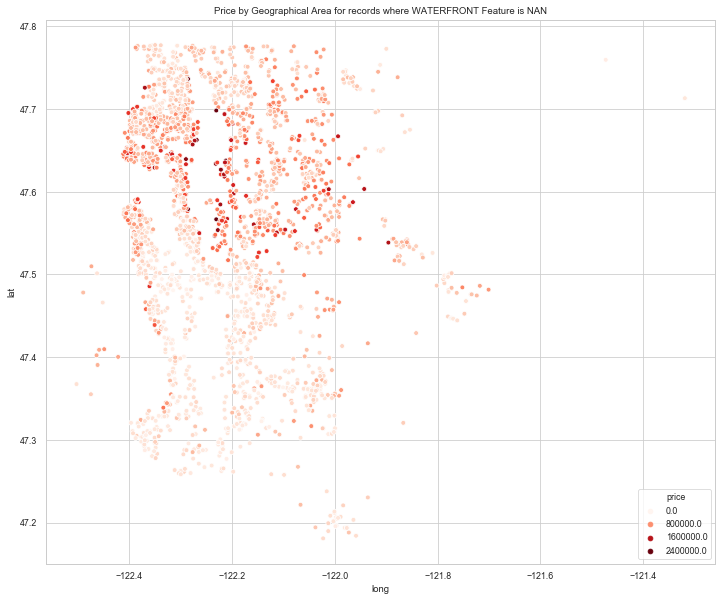

In [66]:
#Checking map for distribution of NaN records for waterfront. They seem to be scattered all over.
#Both waterfront and not. Of course they could be near the water but not waterfront.
small_df = data[data['waterfront'].isnull()]
plt.figure(figsize=(12,10))
sns.scatterplot(small_df['long'], small_df['lat'], hue=small_df['price'], palette='Reds')
plt.legend(loc='lower right')
plt.title("Price by Geographical Area for records where WATERFRONT Feature is NAN")

In [67]:
#Waterfront - Almost all records are 0. Only 101 records to use for waterfront.
#Decision to make NaN values = 0 as it is a solid assumption I believe.
#Decision to drop column, but will keep for analysis in my questions notebook. - it was in one of my questions.
data['waterfront'] = data['waterfront'].fillna(0)
data['waterfront'] = data['waterfront'].astype(int)
data['waterfront'].value_counts()

0    21247
1      101
Name: waterfront, dtype: int64

In [68]:
#Year Renovated - only 713 records have a non-zero value. Not sure what constitutes "renovated"
#I would expect older homes to have been renovated but newer ones to have not.

#Decision: Update yr_renovated to be: yr_renovated OR yr_built, whichever is greater.

#Fill NAN in yr_renovated with yr_built - last known renovation is when built
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_built'])

#Update yr_renovated with newest of yr_built or yr_renovated
data['yr_renovated'] = data.apply(
    lambda x: 
    x.yr_built if (x.yr_built > x.yr_renovated) else x.yr_renovated, 
    axis=1)

In [69]:
#Square Foot Lot - decided to remove outliers where square footage is greater than 300,000 which is about 330 records
data = data.loc[data['sqft_lot'] < 150000]

#Square Foot Lot 15 - decided to remove outliers where square footage is greater than 300,000
data = data.loc[data['sqft_lot15'] < 150000]

In [70]:
#Square Foot Living - remove > 6000 which is only 12 records (after my other data slicing)
data = data.loc[data['sqft_living']<6000]

**I continually ran the code below** 

Removed outliers and ran again

sqft_lot has an interesting scatterplot. It almost looks like there are two things going on.
Price goes up with a larger lot, but there appear to be two separate fit lines. It is probably an urban vs rural thing.

In [84]:
#ist of feature names to run histograms and scatterplots on to check for outliers
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'yr_built',
                 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'has_basement']

bedrooms


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


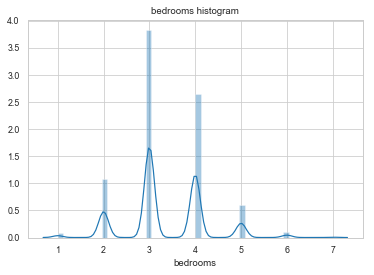

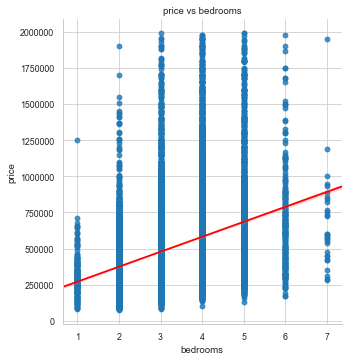

bathrooms


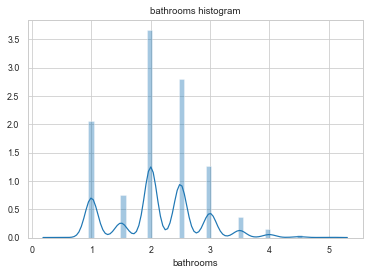

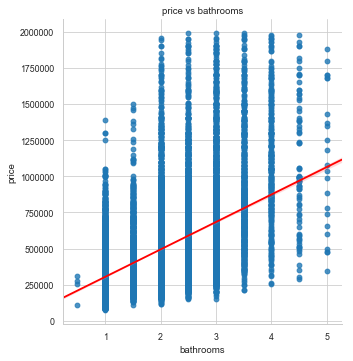

sqft_living


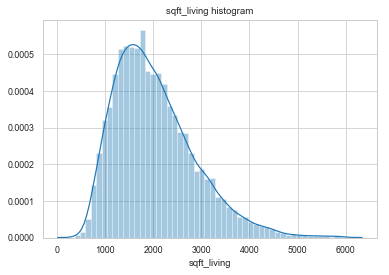

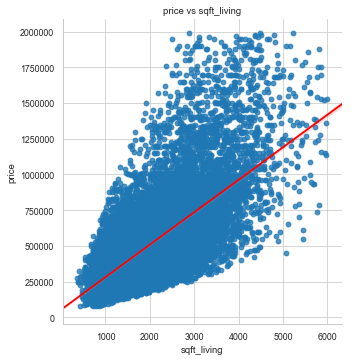

sqft_lot


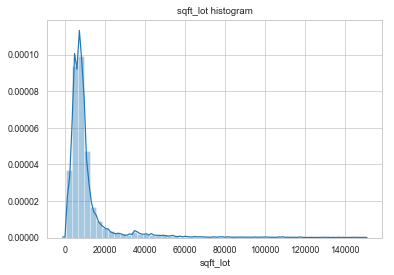

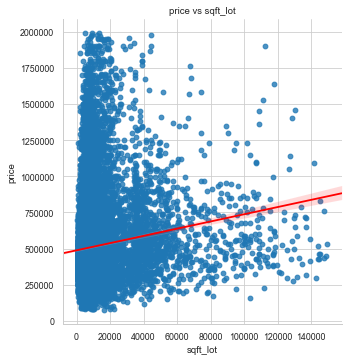

floors


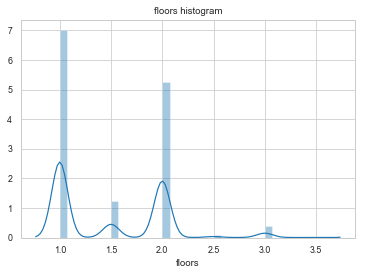

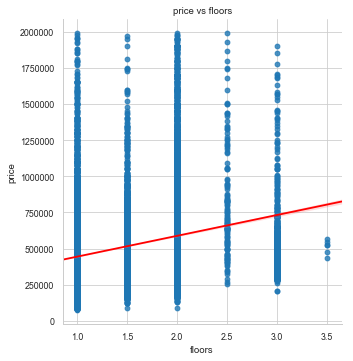

condition


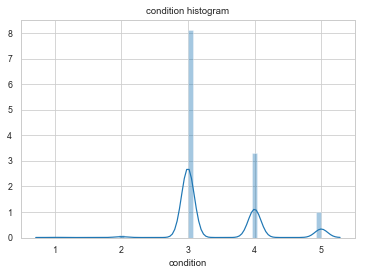

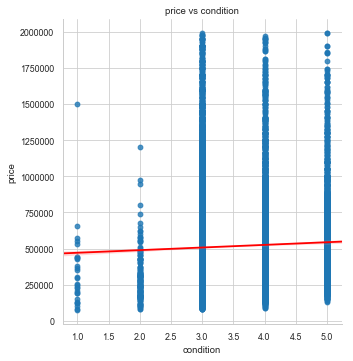

grade


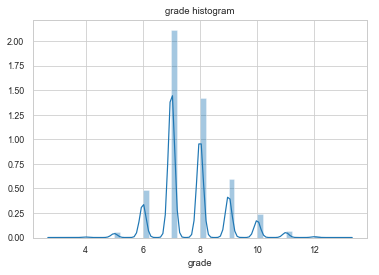

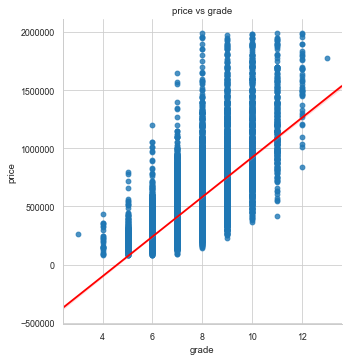

sqft_above


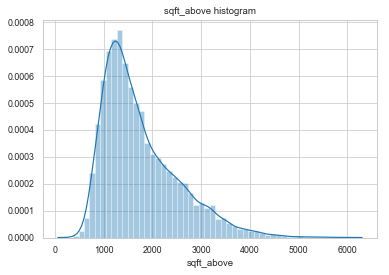

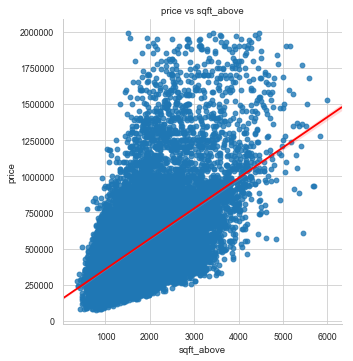

yr_built


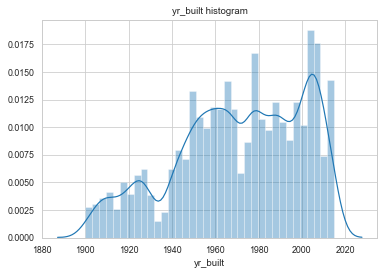

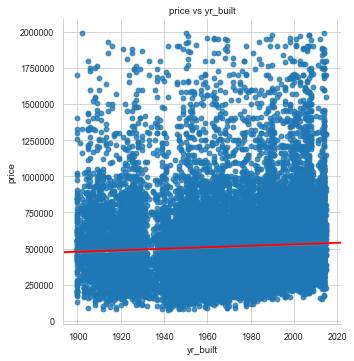

yr_renovated


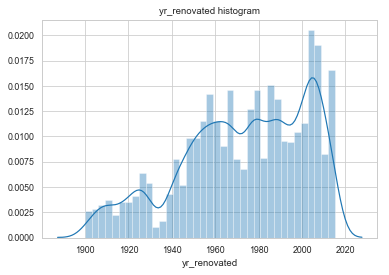

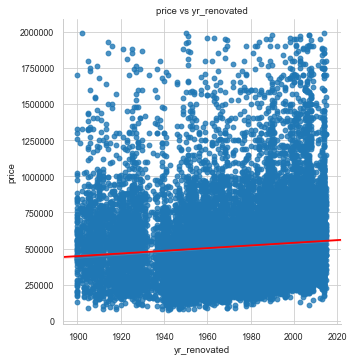

sqft_living15


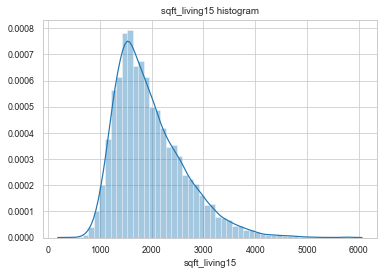

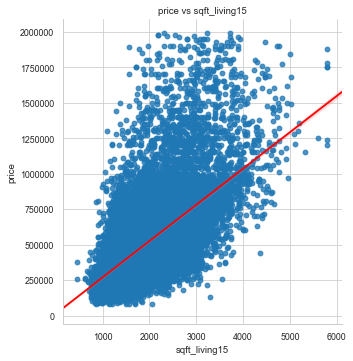

sqft_lot15


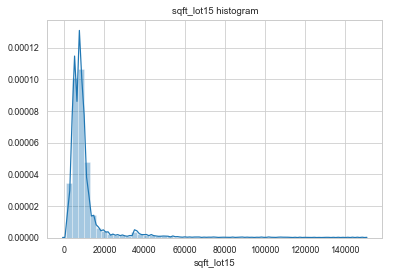

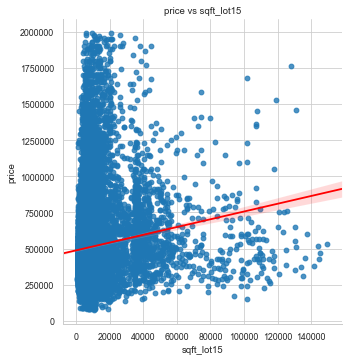

has_basement


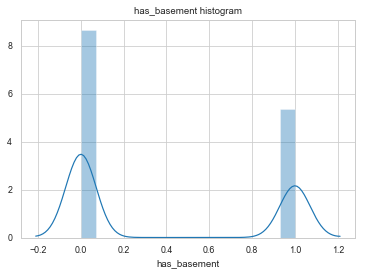

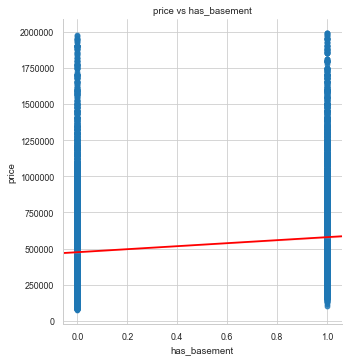

In [85]:
#plot the features in a histogram and scatter w/ target
for feature in feature_names:
    feature_plots(feature, 'price', data)


### Step 5: Save dataframe for use in other notebooks

* **Questions** notebook
* More **EDA** and **Modeling** Notebook

In [73]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
zip_981          0
has_basement     0
dtype: int64

#### Pickle my DataFrame!

In [86]:
#Import library
import pickle

#Write data to file
with open('data.pickle','wb') as f:
    pickle.dump(data,f,pickle.HIGHEST_PROTOCOL)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20963 entries, 0 to 21596
Data columns (total 19 columns):
price            20963 non-null float64
bedrooms         20963 non-null int64
bathrooms        20963 non-null float64
sqft_living      20963 non-null int64
sqft_lot         20963 non-null int64
floors           20963 non-null float64
waterfront       20963 non-null int64
condition        20963 non-null int64
grade            20963 non-null int64
sqft_above       20963 non-null int64
yr_built         20963 non-null int64
yr_renovated     20963 non-null float64
zipcode          20963 non-null int64
lat              20963 non-null float64
long             20963 non-null float64
sqft_living15    20963 non-null int64
sqft_lot15       20963 non-null int64
zip_981          20963 non-null int64
has_basement     20963 non-null int64
dtypes: float64(6), int64(13)
memory usage: 3.2 MB


### Step 5 - Transform some of the data

**Transform Zip code into something more meaningful:**

Washington Kings County zip code prefixes
- 980	WA	Seattle	Bellevue, Auburn, areas around Seattle
- 981	WA	Seattle	SEATTLE

Our dataset only contains two washington prefixes - 980 and 981. Will treat as categorical variable. zip_981

In [137]:
#Verify prefixes that exist in the dataset
zip_prefix = data['zipcode']//100
zip_prefix.drop_duplicates(inplace = True)
zip_prefix


0    981
2    980
Name: zipcode, dtype: int64

In [138]:
#create new column zip_981
data['zip_981'] = data['zipcode'].apply(lambda x: 1 if x//100 == 981 else 0)

#drop old zipcode
data = data.drop(['zipcode'], axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,zip_981
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,1
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,0


In [164]:
correlations = data.corr()
correlations['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
bedrooms         0.315961
lat              0.306687
floors           0.256820
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
zip_981         -0.011974
dist_to_city    -0.408011
Name: price, dtype: float64

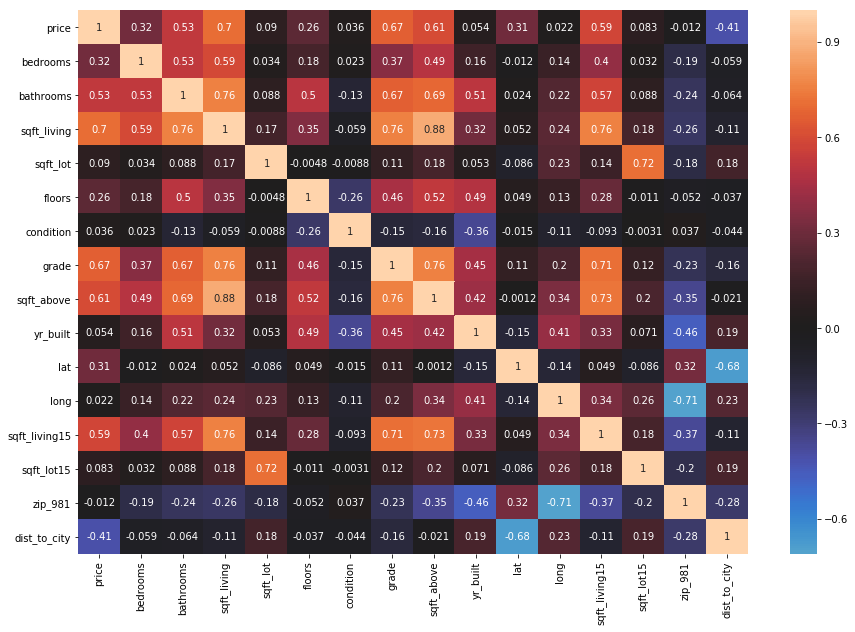

In [166]:
plt.figure(figsize=(15,10))
sns.heatmap(correlations, center=0, annot=True)

Looks like making the zip_981 code category was not useful (not correlated with price). I'm going to drop it.

Also going to drop other features not correlated with price: sqft_lot, yr_built, sqft_lot15.

In [ ]:
data = data.drop(['sqft_lot', 'sqft_lot15', 'yr_built'], axis=1)

**Do something with lat and long**

Going to convert them into a distance from the central business district of Seattle

In [162]:
#I'm going to convert lat and long to a new category that represents distance to pike place market in seattle.
#business_district = 47.6084, -122.3405
#bellvue_washington = 47.6101, -122.2015 **
#northgate = 47.7086, -122.3232
#laurelhurst = 47.658977, -122.275510
#hawthorne hills = 47.673228, -122.276961
#madison park = 47.633973, -122.280496
expensive_place = (47.6101, -122.2015)

import math
def distance_to_business_district(lat1, lon1):
    """
    Calculate the Haversine distance to Seattle's business district.

    Parameters
    ----------
    origin : tuple of float (lat, long)

    Returns
    -------
    distance in miles: float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat2, lon2 = expensive_place
    radius = 3958.756  # miles

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d



In [163]:
dist = []
for lat, long in zip(data.lat, data.long):
    dist.append(distance_to_business_district(lat,long))
    
data['dist_to_city'] = dist
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,zip_981,dist_to_city
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,1,7.306878
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,1,9.413075
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,0,8.950913
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,1,10.852440
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,0,7.304112


**dist_to_city** - Awesome! Created feature from lat and long to get a distance from Bellvue, Washington feature. This is negatively correlated with the price (which makes sense because the closer you are to Bellvue, the more expensive the homes are). 

**Checking histograms for each feature**

Quick check

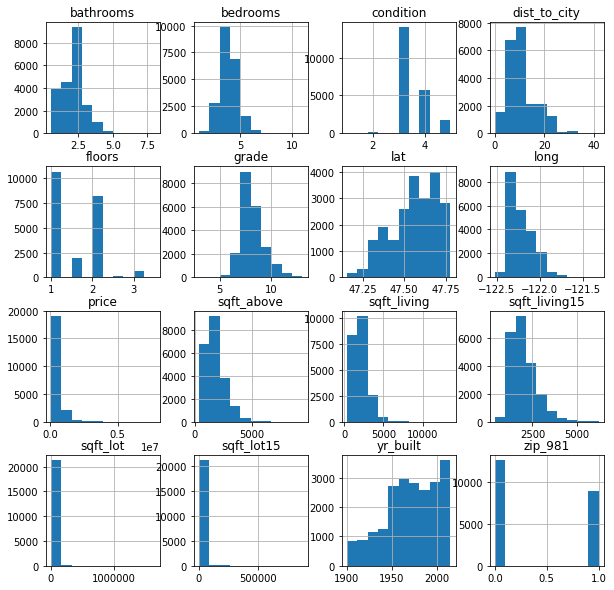

In [165]:
data.hist(figsize=(10,10));

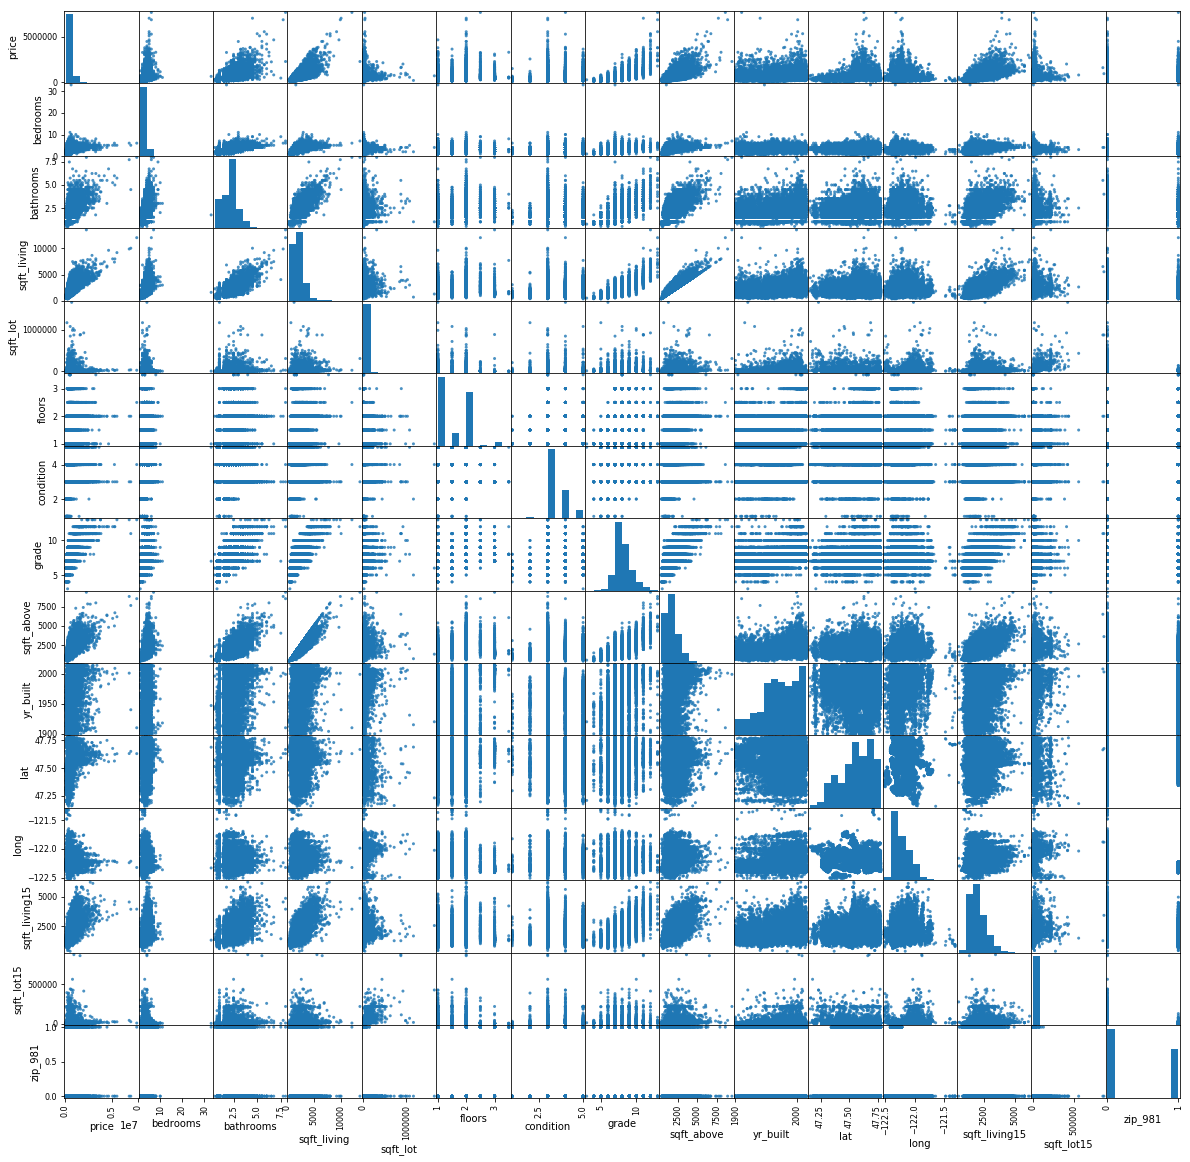

In [65]:
pd.plotting.scatter_matrix(data,figsize=(20,20), diagonal='hist', alpha=0.8);

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

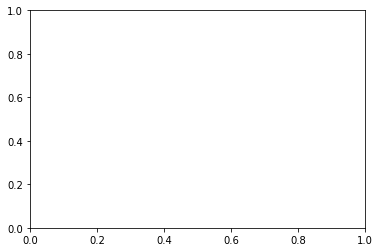

In [114]:
data.plot.kde()